<a href="https://colab.research.google.com/github/Foulach/project_an/blob/main/regression3_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Les différences avec le dernier modèle :
*  Nous ajoutons une variable supplémentaire : **population_density**.
*  Nous améliorons deux paramètres du modèle RANSAC : nous supprimons le paramètre **residual_threshold** (seuil pour identifier les inliers) et modifions **min_samples** (de 50 à 0,9) afin d'augmenter la quantité de données utilisées pour l'échantillonnage.






## Data import and cleaning

In [ ]:
# import the dataset from google drive

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/happiness_project/regressions/merged_df.csv')
df.head()

Mounted at /content/drive


,year,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,id,average monthly earnings,population_density,unemployment rate,weekly hours worked,maternity leave duration
0,2015,switzerland,western europe,7.587,84231.63,1.34951,0.94143,0.66557,0.29678,0.41978,switzerland_2015,5966.104,209.668880,4.801,36.22,0.0
1,2015,iceland,western europe,7.561,53227.63,1.40223,0.94784,0.62877,0.43630,0.14145,iceland_2015,4692.284,3.282376,3.979,38.92,0.0
2,2015,denmark,western europe,7.527,53478.50,1.36058,0.87464,0.64938,0.34139,0.48357,denmark_2015,4931.349,142.092450,6.278,32.67,0.0
3,2015,norway,western europe,7.522,74568.14,1.33095,0.88521,0.66973,0.34699,0.36503,norway_2015,5282.629,14.247059,4.296,34.3,91.0
4,2015,canada,north america and anz,7.427,43628.43,1.32261,0.90563,0.63297,0.45811,0.32957,canada_2015,3212.450,4.091872,6.945,35.55,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          1152 non-null   int64  
 1   country                       1152 non-null   object 
 2   region                        1152 non-null   object 
 3   happiness_score               1152 non-null   float64
 4   gdp_per_capita                1152 non-null   float64
 5   social_support                1152 non-null   float64
 6   healthy_life_expectancy       1152 non-null   float64
 7   freedom_to_make_life_choices  1152 non-null   float64
 8   generosity                    1152 non-null   float64
 9   perceptions_of_corruption     1152 non-null   float64
 10  id                            1152 non-null   object 
 11  average monthly earnings      696 non-null    float64
 12  population_density            1152 non-null   float64
 13  une

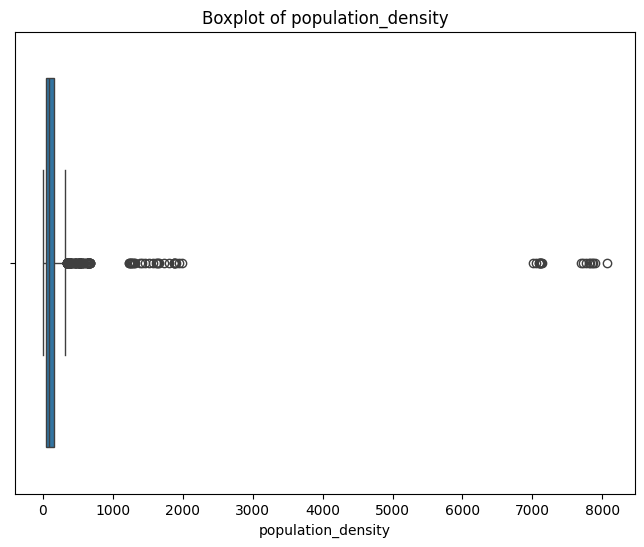

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les colonnes numériques pour l'analyse
df_numeric = df[['population_density']]

# Créer des boxplots pour chaque colonne, un par un
for col in df_numeric.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_numeric[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

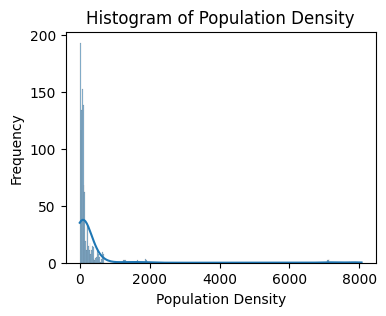

In [ ]:
# Sélectionner les colonnes numériques pour l'analyse
df_numeric = df[['population_density']]

# Créer des histogrammes pour chaque colonne
for col in df_numeric.columns:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col.replace('_', ' ').title()}")
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Frequency")
    plt.show()

Conclusions:

## Modeling

### Preprocessing

In [ ]:
# Select relevant columns for X and y
X = df[['gdp_per_capita', 'social_support', 'healthy_life_expectancy',
         'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'population_density']]
y = df['happiness_score']

In [ ]:
# Split into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a Linear Regression model that predicts happiness_score (our y) based on our X variables.

from sklearn.linear_model import LinearRegression
model_1 = LinearRegression().fit(X_train_scaled, y_train)

### Evaluation

In [ ]:
# Score the model

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Make predictions on the test set
y_pred = model_1.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R-squared: 0.7395260472188796
Mean Squared Error: 0.2820454157257476
Mean Absolute Error: 0.4115585670381258


## Coefficients et leur interprétation

In [ ]:
# Obtenir les coefficients du modèle
coefficients = model_1.coef_
intercept = model_1.intercept_

# Afficher les coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Associer les coefficients aux noms des colonnes pour une interprétation plus facile
for name, coef in zip(X.columns, coefficients):
    print(f"{name}: {coef}")

Intercept: 5.553365037648209
Coefficients: [ 0.37907963  0.24253441  0.34954466  0.26341459 -0.02615206  0.06966825
 -0.1442762 ]
gdp_per_capita: 0.37907962969562903
social_support: 0.24253441453127011
healthy_life_expectancy: 0.3495446595462038
freedom_to_make_life_choices: 0.26341458903275927
generosity: -0.02615205948290232
perceptions_of_corruption: 0.0696682527609351
population_density: -0.14427619626715393


## Variance Inflation Factor (VIF)

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Utiliser les mêmes données que pour la régression linéaire
X = df[['gdp_per_capita', 'social_support', 'healthy_life_expectancy',
        'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'population_density']]

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Afficher les résultats
print(vif_data)

                        feature        VIF
0                         const  23.905222
1                gdp_per_capita   2.844275
2                social_support   1.695833
3       healthy_life_expectancy   1.776078
4  freedom_to_make_life_choices   1.442710
5                    generosity   1.074538
6     perceptions_of_corruption   2.471053
7            population_density   1.161221



# RANSAC MODEL

In [ ]:
# Importer les bibliothèques nécessaires
import numpy as np
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Initialisation du modèle de régression linéaire et du modèle RANSAC
linear_model = LinearRegression()
ransac = RANSACRegressor(estimator=linear_model,
                         min_samples=50,        # Nombre minimum d'échantillons pour ajuster le modèle
                         residual_threshold=10,  # Seuil pour identifier les inliers
                         max_trials=100)         # Nombre maximum d'itérations pour trouver un bon modèle

# Entraînement du modèle RANSAC
ransac.fit(X, y)

# Obtenir les prédictions et afficher les coefficients du modèle
y_pred = ransac.predict(X)

# Afficher les coefficients et l'intercept
print(f"Intercept: {ransac.estimator_.intercept_}")
print(f"Coefficients: {ransac.estimator_.coef_}")

# Associer les coefficients aux noms des colonnes pour une interprétation plus facile
for name, coef in zip(X.columns, ransac.estimator_.coef_):
    print(f"{name}: {coef}")

# Évaluer les performances du modèle
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")

# Identifier les inliers et outliers
inlier_mask = ransac.inlier_mask_  # Masque des inliers
outlier_mask = np.logical_not(inlier_mask)  # Masque des outliers

# Affichage des inliers et outliers
print(f"Nombre d'inliers: {np.sum(inlier_mask)}")
print(f"Nombre d'outliers: {np.sum(outlier_mask)}")

Intercept: 2.739326985069182
Coefficients: [ 0.00000000e+00  1.62957595e-05  7.36763289e-01  1.48986689e+00
  1.81818095e+00 -1.04406309e-01  5.39184051e-01 -1.52242910e-04]
const: 0.0
gdp_per_capita: 1.629575952089994e-05
social_support: 0.7367632887574812
healthy_life_expectancy: 1.4898668898072946
freedom_to_make_life_choices: 1.8181809530813096
generosity: -0.10440630891666675
perceptions_of_corruption: 0.5391840512262772
population_density: -0.0001522429096976373
R2 Score: 0.7464987158880815
Mean Squared Error: 0.3042537230372396
Nombre d'inliers: 1152
Nombre d'outliers: 0


In [ ]:
# Importer les bibliothèques nécessaires
import numpy as np
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Initialisation du modèle de régression linéaire et du modèle RANSAC
linear_model = LinearRegression()
ransac = RANSACRegressor(estimator=linear_model,
                         min_samples=0.9,        # Nombre minimum d'échantillons pour ajuster le modèle
                         max_trials=100)         # Nombre maximum d'itérations pour trouver un bon modèle

# Entraînement du modèle RANSAC
ransac.fit(X, y)

# Obtenir les prédictions et afficher les coefficients du modèle
y_pred = ransac.predict(X)

# Afficher les coefficients et l'intercept
print(f"Intercept: {ransac.estimator_.intercept_}")
print(f"Coefficients: {ransac.estimator_.coef_}")

# Associer les coefficients aux noms des colonnes pour une interprétation plus facile
for name, coef in zip(X.columns, ransac.estimator_.coef_):
    print(f"{name}: {coef}")

# Évaluer les performances du modèle
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")

# Identifier les inliers et outliers
inlier_mask = ransac.inlier_mask_  # Masque des inliers
outlier_mask = np.logical_not(inlier_mask)  # Masque des outliers

# Affichage des inliers et outliers
print(f"Nombre d'inliers: {np.sum(inlier_mask)}")
print(f"Nombre d'outliers: {np.sum(outlier_mask)}")

Intercept: 2.7475089426366077
Coefficients: [ 0.00000000e+00  1.65670685e-05  6.98914667e-01  1.41117430e+00
  2.15046328e+00 -2.44559371e-01  4.67100157e-01 -1.62714413e-04]
const: 0.0
gdp_per_capita: 1.656706846671125e-05
social_support: 0.6989146666744704
healthy_life_expectancy: 1.4111743027504253
freedom_to_make_life_choices: 2.150463277547502
generosity: -0.24455937097339567
perceptions_of_corruption: 0.46710015685548306
population_density: -0.00016271441253022726
R2 Score: 0.7432440222514428
Mean Squared Error: 0.30816002536530096
Nombre d'inliers: 994
Nombre d'outliers: 158


In [ ]:
# prompt: affiche les outliers

# Afficher les outliers
outliers = df[outlier_mask]
print(outliers)


      year      country                        region  happiness_score  \
10    2015       israel  middle east and north africa            7.278   
11    2015   costa rica   latin america and caribbean            7.226   
13    2015       mexico   latin america and caribbean            7.187   
15    2015       brazil   latin america and caribbean            6.983   
16    2015   luxembourg                western europe            6.946   
...    ...          ...                           ...              ...   
1145  2023     tanzania            sub-saharan africa            3.694   
1147  2023     botswana            sub-saharan africa            3.435   
1148  2023     zimbabwe            sub-saharan africa            3.204   
1150  2023      lebanon  middle east and north africa            2.392   
1151  2023  afghanistan                    south asia            1.859   

      gdp_per_capita  social_support  healthy_life_expectancy  \
10          36138.71         1.22393          